## ステップ関数のグラフ

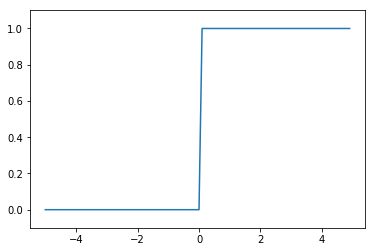

In [9]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y軸の範囲を指定
plt.show()

## シグモイド関数の実装

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [12]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

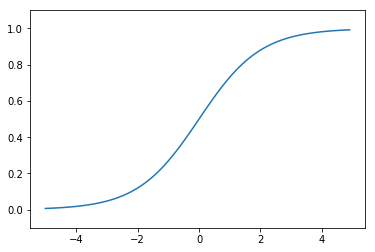

In [15]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y軸の範囲を指定
plt.show()

## ReLU関数

In [16]:
def relu(x):
    return np.maximum(0, x)

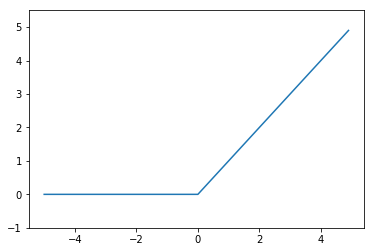

In [20]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

# 多次元配列の計算

## 多次元配列

### 1次元の配列

In [21]:
import numpy as no
A = np.array([1, 2, 3, 4])

In [22]:
print(A)

[1 2 3 4]


In [23]:
np.ndim(A) # 配列の次元数

1

In [24]:
A.shape # 配列の形状（要素数）

(4,)

### 2次元の配列(行列)

In [25]:
B = np.array([[1,2], [3,4], [5,6]])

In [26]:
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [27]:
np.ndim(B)

2

In [29]:
B.shape

(3, 2)

## 行列の積

In [36]:
A = np.array([[1,2],[3,4]])
print(A)

[[1 2]
 [3 4]]


In [32]:
A.shape

(2, 2)

In [37]:
B = np.array([[5,6],[7,8]])
print(B)

[[5 6]
 [7 8]]


In [34]:
B.shape

(2, 2)

In [38]:
np.dot(A, B) # 行列の積を求める

array([[19, 22],
       [43, 50]])

### 別の形状の行列の積 

In [39]:
A = np.array([[1,2,3],[4,5,6]])
print(A)

[[1 2 3]
 [4 5 6]]


In [41]:
A.shape # 1次元目の要素数は3

(2, 3)

In [42]:
B = np.array([[1,2],[3,4],[5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [43]:
B.shape # 0次元目の要素数は3

(3, 2)

In [44]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

### 要素数がそろっていない行列の積

In [45]:
C = np.array([[1,2],[3,4]])
print(C)

[[1 2]
 [3 4]]


In [46]:
C.shape

(2, 2)

In [47]:
A.shape

(2, 3)

In [48]:
np.dot(A,C) # 該当次元の要素数が異なるためエラー

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [49]:
np.dot(C, A)

array([[ 9, 12, 15],
       [19, 26, 33]])

### 2次元の行列と1次元の配列の積

In [51]:
A = np.array([[1,2], [3,4], [5,6]])
print(A)

[[1 2]
 [3 4]
 [5 6]]


In [53]:
A.shape

(3, 2)

In [55]:
B = np.array([7,8])
print(B)

[7 8]


In [56]:
B.shape

(2,)

In [57]:
np.dot(A, B)

array([23, 53, 83])

## ニューラルネットワークの行列の積

In [59]:
X = np.array([1, 2])

In [60]:
X.shape

(2,)

In [61]:
W = np.array([[1, 3, 5], [2, 4, 6]])

In [62]:
print(W)

[[1 3 5]
 [2 4 6]]


In [63]:
W.shape

(2, 3)

In [64]:
Y = np.dot(X, W)

In [65]:
print(Y)

[ 5 11 17]


# ３層ニューラルネットワークの実装

## 各層における信号伝達の実装

In [75]:
#1層目
X = np.array([1.0, 0.5])# 入力層
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])# 重み
B1 = np.array([0.1, 0.2, 0.3])                         # バイアス

A1 = np.dot(X, W1) + B1

In [76]:
#活性化関数のプロセス
Z1 = sigmoid(A1)

In [77]:
print(A1)

[0.3 0.7 1.1]


In [78]:
print(Z1)

[0.57444252 0.66818777 0.75026011]


In [79]:
# 2層目
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

In [80]:
print(Z2)

[0.62624937 0.7710107 ]


In [81]:
# 出力層への伝達
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

In [82]:
print(Y)

[0.31682708 0.69627909]


## 実装のまとめ

In [84]:
def identity_function(x):
    return x

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


# 出力層の設計
回帰問題では恒等関数を、分類問題ではソフトマックス関数を使う

## ソフトマックス関数の実装

In [85]:
a = np.array([0.3, 2.9, 4.0])

In [86]:
exp_a = np.exp(a) # 指数関数

In [87]:
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [88]:
sum_exp_a = np.sum(exp_a) # 指数関数の和

In [89]:
print(sum_exp_a)

74.1221542101633


In [90]:
y = exp_a /sum_exp_a

In [91]:
print(y)

[0.01821127 0.24519181 0.73659691]


In [92]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

## ソフトマックス関数実装上の注意
指数関数を用いるため、オーバーフローがおきてしまう可能性が高い

In [96]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a)) # ソフトマックス関数の計算

C:\Users\littl\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

In [97]:
c = np.max(a) # 1010

In [98]:
a - c

array([  0, -10, -20])

In [99]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [101]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # オーバーフロー対策
    sum_exp_a = np.sum(exp_a)
    
    y = exp_a / sum_exp_a
    
    return y